In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [38]:
data=pd.read_csv("cleaned_data.csv")
data=data.drop('Unnamed: 0',axis=1)
data


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53779,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53780,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53781,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53782,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# Data Preprocessing

In [6]:
from sklearn import preprocessing

In [7]:
le=preprocessing.LabelEncoder()

In [8]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
data['cut']=le.fit_transform(data['cut'])

In [10]:
data['cut'].unique()

array([2, 3, 1, 4, 0])

In [11]:
data['color']=le.fit_transform(data['color'])

In [12]:
data['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [13]:
data['clarity']=le.fit_transform(data['clarity'])

In [14]:
data['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

### Feature Elimination Before Scaling

In [15]:
from sklearn.feature_selection import RFE

In [16]:
X=data.drop('price',axis=1)

In [17]:
Y=data['price']

In [18]:
X.shape

(53784, 9)

In [19]:
Y.shape

(53784,)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Create the RFE object with the Linear Regression model and specify the desired number of features
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE object to the scaled data
rfe.fit(X, Y)

# Print the rankings of the selected features
feature_rankings = rfe.ranking_
for feature, rank in zip(X.columns, feature_rankings):
    print(f"{feature}: {rank}")

carat: 1
cut: 5
color: 1
clarity: 1
depth: 2
table: 4
x: 1
y: 1
z: 3


#### As we can see by using rfe  carat has  number 1 ranking for rfe and x,y is not valid columns to use so we use carat

In [21]:
selected_columns = ['carat', 'clarity']
selected_data = data[selected_columns]



from sklearn.preprocessing import StandardScaler
# Scale the selected columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)


In [22]:
X_scaled=scaled_data
X_scaled

array([[-1.2082215 , -0.48624597],
       [-1.25098529, -1.06647878],
       [-1.2082215 ,  0.09398684],
       ...,
       [-0.20327233, -1.06647878],
       [ 0.13883802, -0.48624597],
       [-0.09636285, -0.48624597]])

### Using MLR

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

In [24]:
y_pred

array([ -467.86701896,  5568.99818952,  1947.03293176, ...,
        6816.84325946,  5811.36875699, 14155.15721843])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

R2: 0.8739491103681822
Mean Squared Error (MSE): 1972237.1372459442
Mean Absolute Error (MAE): 943.9132173673365


### Using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
# Create a  model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

In [27]:
y_pred

array([  587.65198238,  4277.75396825,  1816.33333333, ...,
        6661.74468085,  4321.68421053, 15213.66666667])

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

R2: 0.9351751939777847
Mean Squared Error (MSE): 1014272.0152568094
Mean Absolute Error (MAE): 543.2151180233747


### Using random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [30]:
y_pred

array([  587.32973196,  4277.33986913,  1812.64467227, ...,
        6667.51862701,  4325.99094696, 15104.63140476])

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

R2: 0.9362470632385997
Mean Squared Error (MSE): 997501.1668429147
Mean Absolute Error (MAE): 541.1821039100316


### Checking if predcition are correct or not

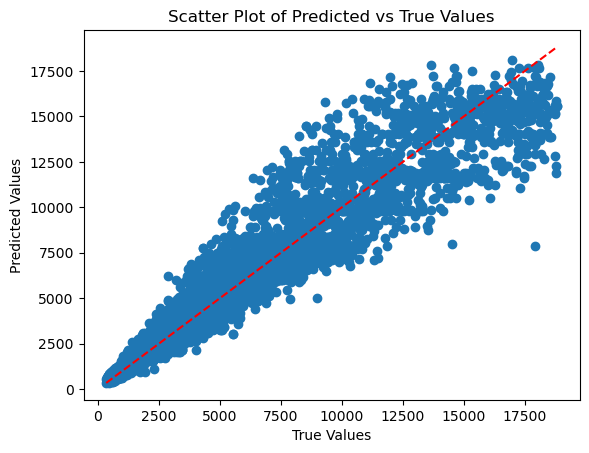

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs True Values')
plt.show()

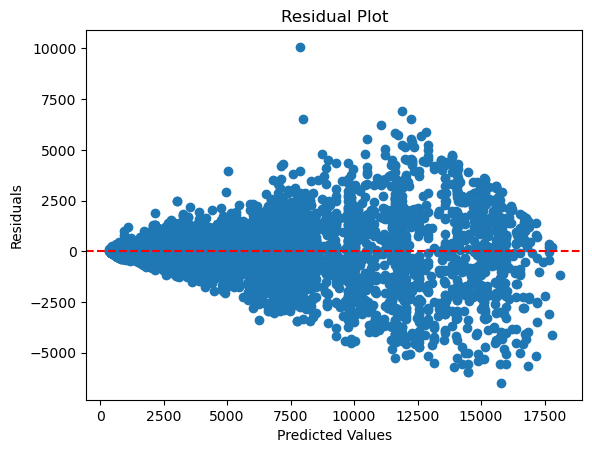

In [33]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

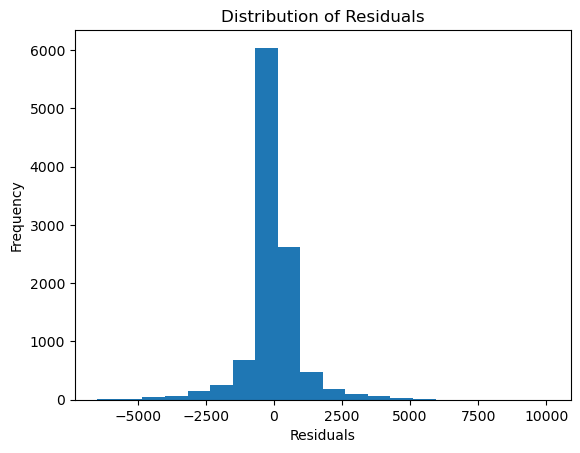

In [34]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [37]:
# pickle to import pickle file for deploy of ml model on stramlit or pn flask
import pickle
file=open('random_forest_model.pkl','wb')
pickle.dump(model, file)